### CS_746_PDS Final Project

In [1]:
# importing the pandas python library

import pandas as pd 

In [2]:
# Read the data 
df = pd.read_csv('questionnaire responses.csv')

In [3]:
columns = df.columns

print(columns)

Index(['Timestamp', 'Are you an international student?',
       'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?',
       'What is your WSU id?', 'Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your current address?',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for y

In [4]:
# Remove unnecessary columns

columns_to_drop = ['Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']

df = df.drop(columns=columns_to_drop,axis=1)


In [5]:
# rename columns for more readability

df.columns = [
    'timestamp', 'international_student', 'willing_to_fill_form', 'wsu_id', 'residence_type',
    'time_in_wichita_months', 'current_address', 'apartment_name', 'people_in_unit', 'unit_size',
    'satisfaction', 'management_responsiveness', 'safety_level', 'monthly_rent', 'initial_payment',
    'rental_insurance', 'monthly_insurance', 'monthly_bills', 'guarantor_required', 'pet_friendly',
    'free_parking', 'relocation_count', 'previous_address', 'previous_satisfaction', 'reason_to_vacate',
    'preferred_transport', 'time_to_wsu', 'time_to_transit_stop', 'transit_time_to_university',
    'drive_time_to_university', 'ride_difficulty', 'travel_cost', 'time_to_grocery', 'time_to_restaurant',
    'laundry_type', 'current_residence', 'other_current_residence', 'current_stay_satisfaction',
    'other_info', 'other_apartment_name', 'other_people_count', 'amenities_included'
]


In [6]:
# Fill missing values in numeric columns with the mean

numeric_columns = [
    'satisfaction', 'management_responsiveness', 'safety_level',
    'monthly_rent', 'initial_payment', 'monthly_bills', 'time_to_wsu',
    'transit_time_to_university', 'drive_time_to_university', 'ride_difficulty',
    'travel_cost', 'time_to_grocery', 'time_to_restaurant'
]

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].mean())

# Fill missing values in categorical columns with 'unknown'
categorical_columns = df.columns.difference(numeric_columns)
for column in categorical_columns:
    df[column] = df[column].astype(str).fillna('unknown')


In [7]:
## explore the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   336 non-null    object 
 1   international_student       336 non-null    object 
 2   willing_to_fill_form        336 non-null    object 
 3   wsu_id                      336 non-null    object 
 4   residence_type              336 non-null    object 
 5   time_in_wichita_months      336 non-null    object 
 6   current_address             336 non-null    object 
 7   apartment_name              336 non-null    object 
 8   people_in_unit              336 non-null    object 
 9   unit_size                   336 non-null    object 
 10  satisfaction                336 non-null    float64
 11  management_responsiveness   336 non-null    float64
 12  safety_level                336 non-null    float64
 13  monthly_rent                336 non

In [9]:
df.isna().sum()

timestamp                     0
international_student         0
willing_to_fill_form          0
wsu_id                        0
residence_type                0
time_in_wichita_months        0
current_address               0
apartment_name                0
people_in_unit                0
unit_size                     0
satisfaction                  0
management_responsiveness     0
safety_level                  0
monthly_rent                  0
initial_payment               0
rental_insurance              0
monthly_insurance             0
monthly_bills                 0
guarantor_required            0
pet_friendly                  0
free_parking                  0
relocation_count              0
previous_address              0
previous_satisfaction         0
reason_to_vacate              0
preferred_transport           0
time_to_wsu                   0
time_to_transit_stop          0
transit_time_to_university    0
drive_time_to_university      0
ride_difficulty               0
travel_c

In [10]:
df.describe()

,satisfaction,management_responsiveness,safety_level,monthly_rent,initial_payment,monthly_bills,time_to_wsu,transit_time_to_university,drive_time_to_university,ride_difficulty,travel_cost,time_to_grocery,time_to_restaurant
count,336.000000,336.000000,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,3.360000e+02,3.360000e+02,336.00000,336.000000,3.360000e+02,3.360000e+02
mean,4.115894,4.082781,4.142384,3.663810e+09,3.010235e+24,3.245638e+17,15.718750,1.881002e+15,9.157668e+62,3.87500,3.750000,2.503331e+13,1.871004e+52
std,0.841008,0.879163,0.822950,5.367740e+10,4.958664e+25,4.902756e+18,4.235059,1.865270e+16,3.076970e+63,0.21072,0.343381,3.778881e+14,3.122935e+53
min,1.000000,1.000000,1.000000,8.000000e+00,1.000000e+00,0.000000e+00,2.000000,2.000000e+00,2.000000e+00,1.00000,0.000000,1.000000e+00,1.000000e+00
25%,4.000000,4.000000,4.000000,8.250000e+02,2.500000e+02,1.700000e+02,15.718750,6.000000e+00,9.157668e+62,3.87500,3.750000,5.000000e+00,5.000000e+00
50%,4.000000,4.000000,4.000000,9.770000e+02,5.000000e+02,3.000000e+02,15.718750,1.500000e+01,9.157668e+62,3.87500,3.750000,6.000000e+00,1.000000e+01
75%,5.000000,5.000000,5.000000,1.200000e+03,1.200000e+03,7.250000e+02,15.718750,1.881002e+15,9.157668e+62,3.87500,3.750000,1.000000e+01,1.625000e+01
max,5.000000,5.000000,5.000000,9.842770e+11,9.090909e+26,8.989760e+19,60.000000,3.423423e+17,5.677754e+64,5.00000,6.000000,6.887788e+15,5.725273e+54


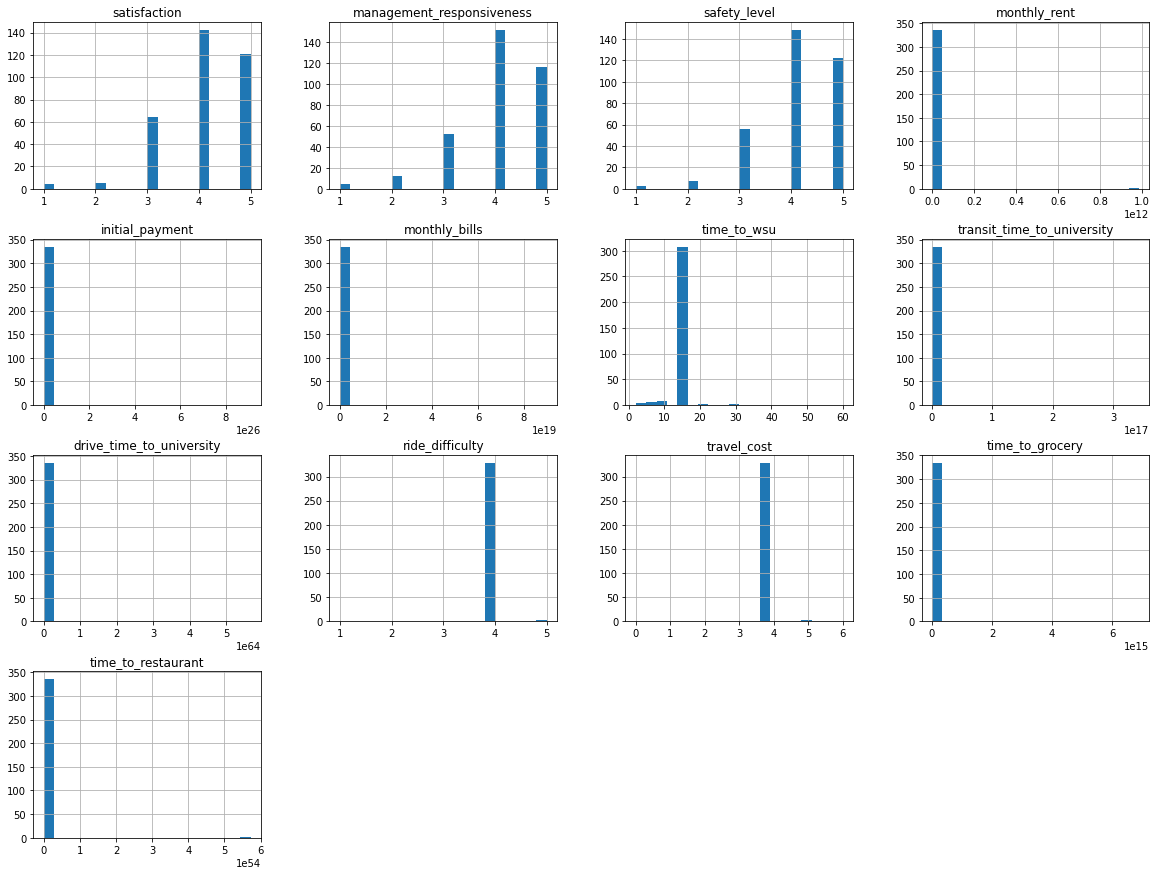

In [11]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20,15))
plt.show()

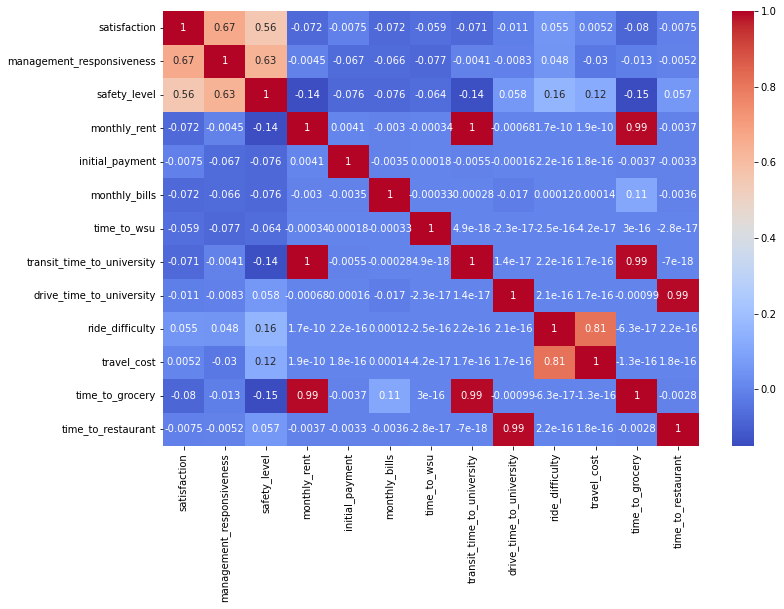

In [12]:
# Calculate the correlation matrix
import seaborn as sns

corr_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

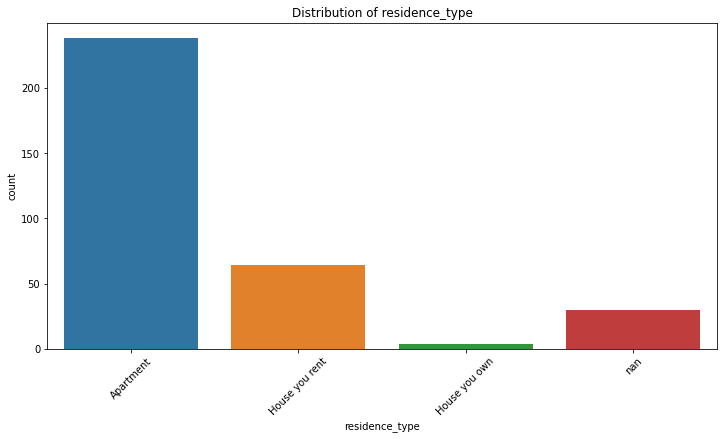

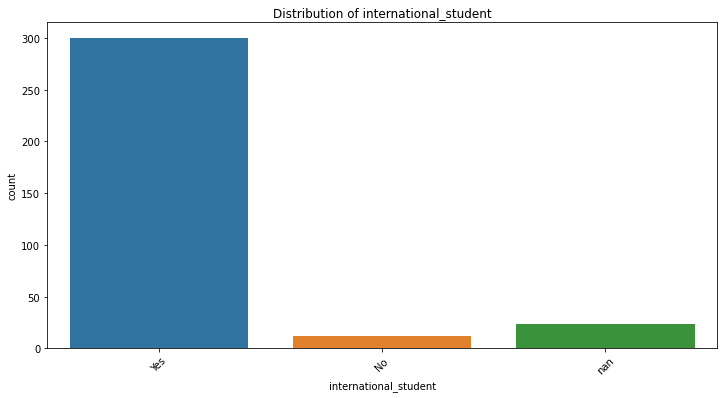

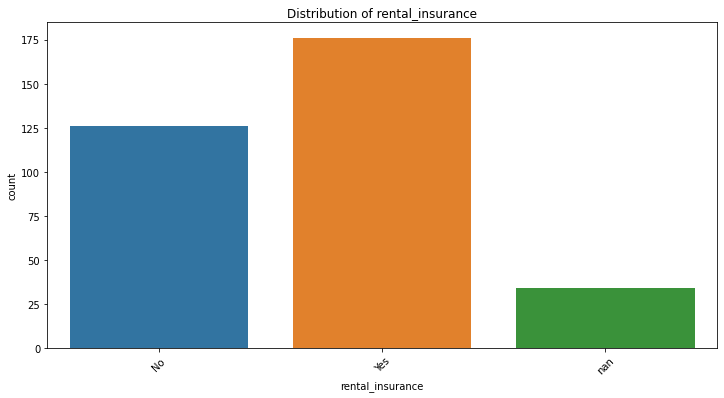

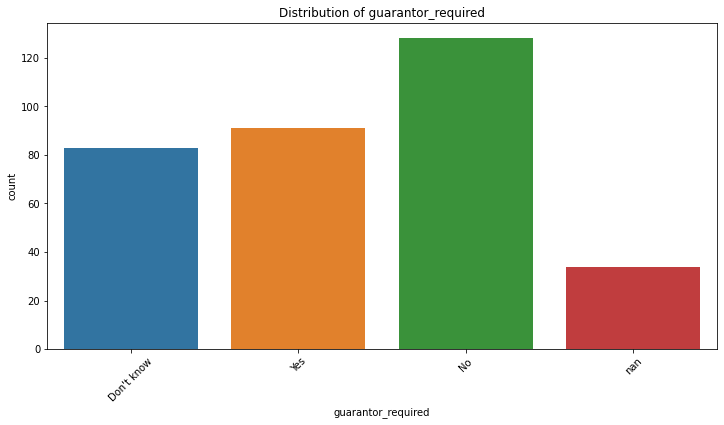

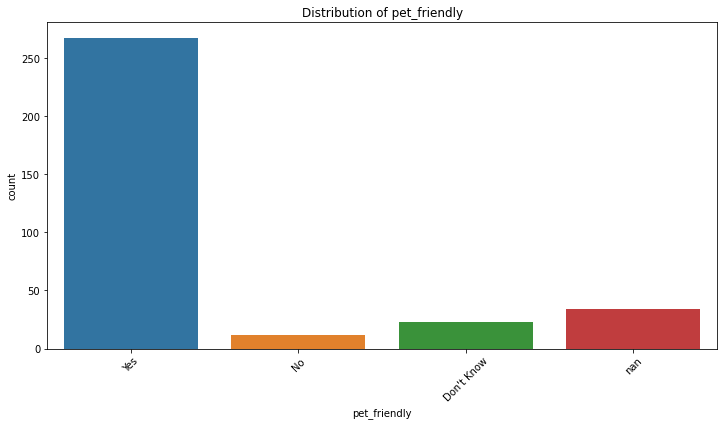

In [13]:
# Display bar plots for categorical variables
categorical_variables = [
    'residence_type', 'international_student', 'rental_insurance', 'guarantor_required',
    'pet_friendly'
]

for column in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column}')
    plt.show()

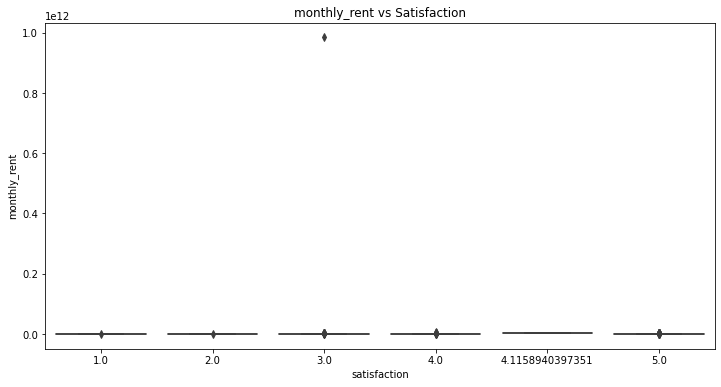

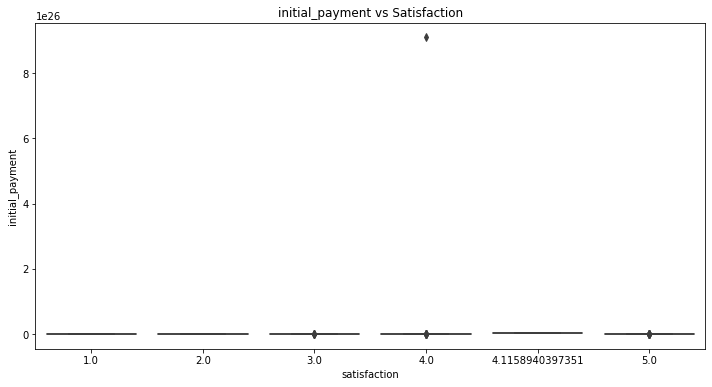

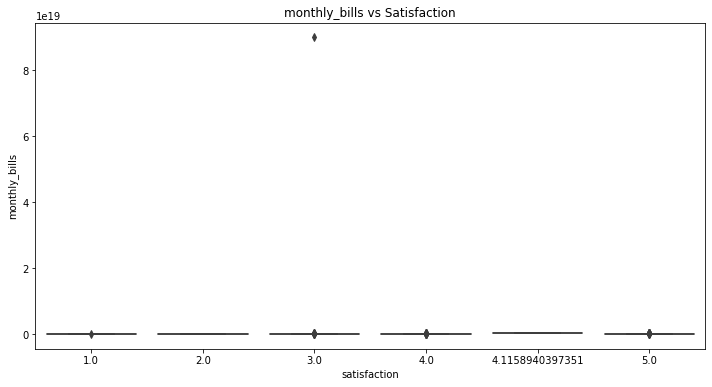

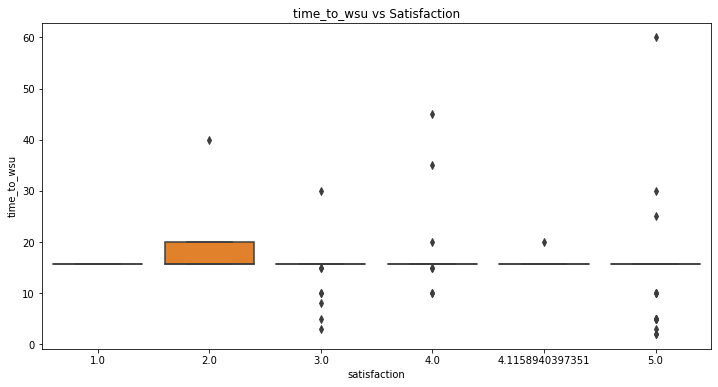

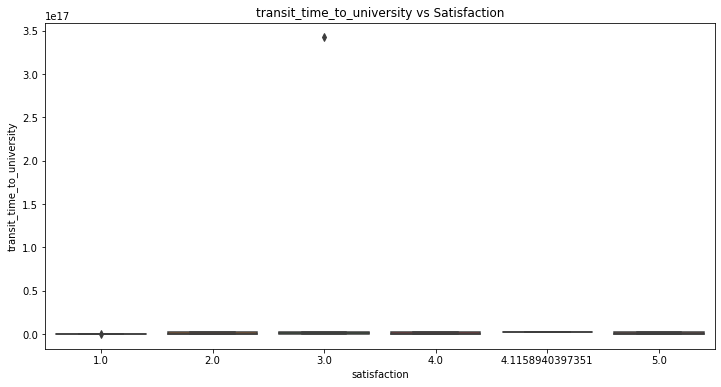

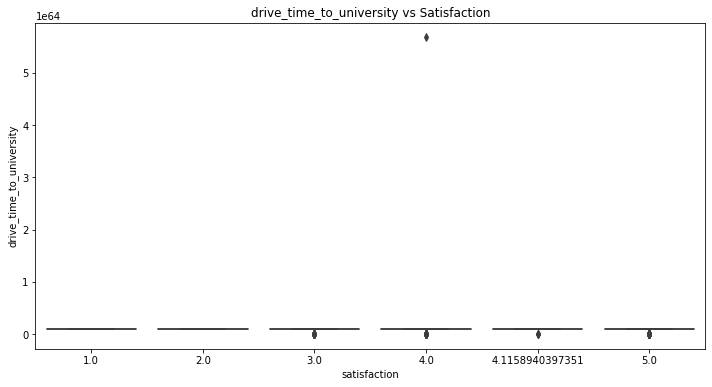

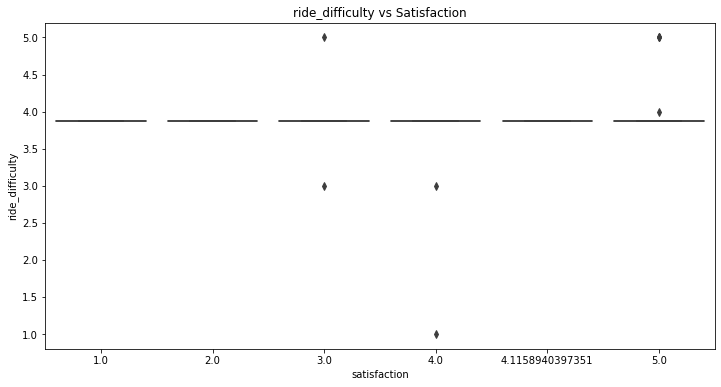

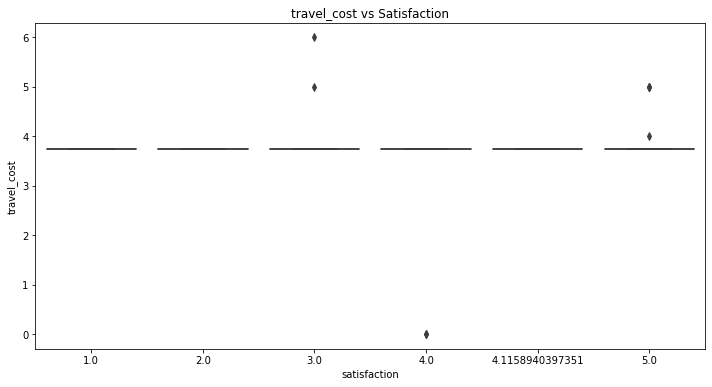

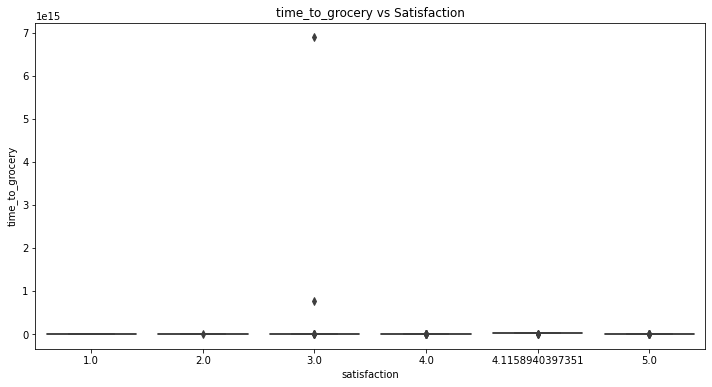

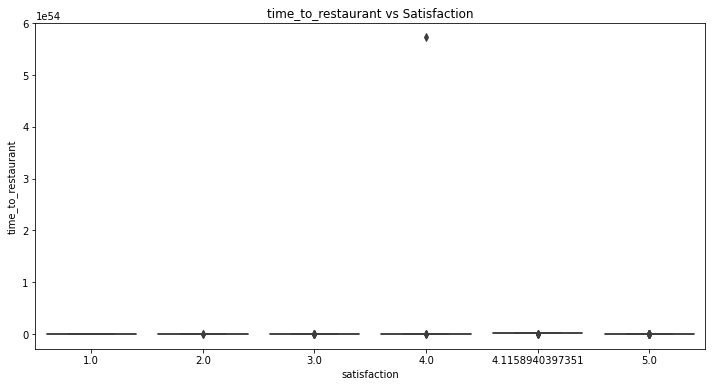

In [14]:
# Display box plots for continuous variables against satisfaction
continuous_variables = [
    'monthly_rent', 'initial_payment', 'monthly_bills', 'time_to_wsu',
    'transit_time_to_university', 'drive_time_to_university', 'ride_difficulty',
    'travel_cost', 'time_to_grocery', 'time_to_restaurant'
]

for column in continuous_variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='satisfaction', y=column)
    plt.title(f'{column} vs Satisfaction')
    plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   336 non-null    object 
 1   international_student       336 non-null    object 
 2   willing_to_fill_form        336 non-null    object 
 3   wsu_id                      336 non-null    object 
 4   residence_type              336 non-null    object 
 5   time_in_wichita_months      336 non-null    object 
 6   current_address             336 non-null    object 
 7   apartment_name              336 non-null    object 
 8   people_in_unit              336 non-null    object 
 9   unit_size                   336 non-null    object 
 10  satisfaction                336 non-null    float64
 11  management_responsiveness   336 non-null    float64
 12  safety_level                336 non-null    float64
 13  monthly_rent                336 non

In [16]:
columns_to_drop = ['timestamp','willing_to_fill_form', 'wsu_id', 'residence_type','current_address', 'guarantor_required']

df = df.drop(columns=columns_to_drop,axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   international_student       336 non-null    object 
 1   time_in_wichita_months      336 non-null    object 
 2   apartment_name              336 non-null    object 
 3   people_in_unit              336 non-null    object 
 4   unit_size                   336 non-null    object 
 5   satisfaction                336 non-null    float64
 6   management_responsiveness   336 non-null    float64
 7   safety_level                336 non-null    float64
 8   monthly_rent                336 non-null    float64
 9   initial_payment             336 non-null    float64
 10  rental_insurance            336 non-null    object 
 11  monthly_insurance           336 non-null    object 
 12  monthly_bills               336 non-null    float64
 13  pet_friendly                336 non

In [18]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Sort correlations with respect to the 'satisfaction' column
correlations_with_satisfaction = corr_matrix['satisfaction'].sort_values(ascending=False)

# Display the sorted correlations
print(correlations_with_satisfaction)


satisfaction                  1.000000
management_responsiveness     0.666561
safety_level                  0.556451
ride_difficulty               0.054743
travel_cost                   0.005168
time_to_restaurant           -0.007541
initial_payment              -0.007542
drive_time_to_university     -0.010931
time_to_wsu                  -0.058618
transit_time_to_university   -0.071229
monthly_bills                -0.071661
monthly_rent                 -0.071923
time_to_grocery              -0.080236
Name: satisfaction, dtype: float64


In [19]:
y = df['satisfaction']

In [20]:
X = df.drop(['satisfaction'],axis =1)

In [21]:
y.value_counts()

5.000000    121
4.000000    108
3.000000     64
4.115894     34
2.000000      5
1.000000      4
Name: satisfaction, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [23]:
X_train.shape

(268, 35)

In [24]:
y_test.shape

(68,)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import time
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder



In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [28]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)


RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_processed)
r2_score(y_test, y_pred)


0.5992742378422962

In [30]:

print(X_train_processed.shape)  # should output (n_samples, n_features)
print(X_test_processed.shape)  # should output (n_samples, n_features)

(268, 480)
(68, 480)


In [31]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate model performance using 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')

# Compute mean and standard deviation of cross-validation scores
mean_score = cv_scores.mean()
std_score = cv_scores.std()

print('Cross-validation scores:', cv_scores)
print('Mean R2 score:', mean_score)
print('Standard deviation of R2 scores:', std_score)


Cross-validation scores: [0.17167746 0.32789969 0.04016491 0.6005184  0.48705781]
Mean R2 score: 0.3254636544092989
Standard deviation of R2 scores: 0.20338106455776447


In [32]:
import pandas as pd

# Define bins for satisfaction levels
bins = [-1, 1, 2, 3, 4, 5]

# Create new categorical variable based on satisfaction levels
y_train_categorical = pd.cut(y_train, bins=bins, labels=False)
y_test_categorical = pd.cut(y_test, bins=bins, labels=False)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train random forest classifier with preprocessed training data and categorical labels
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train_categorical)

# Make predictions on preprocessed test data
y_pred_categorical = model.predict(X_test_processed)

# Compute accuracy score on test data
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)

print('Accuracy:', accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test_categorical, y_pred_categorical, average='macro')
recall = recall_score(y_test_categorical, y_pred_categorical, average='macro')
f1 = f1_score(y_test_categorical, y_pred_categorical, average='macro')


print('Precision:', precision)

print('Recall:', recall)

print('F1 score:', f1)



Accuracy: 0.6617647058823529
Precision: 0.6048387096774194
Recall: 0.48173913043478256
F1 score: 0.5205143040822886


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
